exemple de rnn

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Function to generate a simple sequence dataset for demonstrating GRU capabilities
def generate_time_series_data(num_samples, sequence_length=15):
    """
    Generate time series data with patterns that benefit from GRU's ability to
    capture medium-range dependencies.
    """
    data = np.zeros((num_samples, sequence_length))
    for i in range(num_samples):
        # Initialize with random values
        data[i, 0] = np.random.uniform(0, 1)
        
        # Generate sequence with dependencies
        for j in range(1, sequence_length):
            # First third: AR(1) process
            if j < sequence_length // 3:
                data[i, j] = 0.8 * data[i, j-1] + np.random.normal(0, 0.05)
            # Middle third: Add sine wave pattern
            elif j < 2 * (sequence_length // 3):
                data[i, j] = 0.5 * data[i, j-1] + 0.2 * np.sin(data[i, 0] * np.pi * j) + np.random.normal(0, 0.05)
            # Last third: Add dependency on early values
            else:
                data[i, j] = 0.3 * data[i, j-1] + 0.3 * data[i, 0] + 0.2 * data[i, sequence_length//3] + np.random.normal(0, 0.05)
    
    # Create input sequences (all but last element) and target values (last element)
    X = data[:, :-1]
    y = data[:, -1]
    
    # Reshape X to be [samples, time steps, features]
    X = X.reshape(X.shape[0], X.shape[1], 1)
    
    return X, y

In [4]:
# Generate data
num_samples = 1000
sequence_length = 15
X_data, y_data = generate_time_series_data(num_samples, sequence_length)

# Split into training and testing sets
train_size = int(0.8 * num_samples)
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

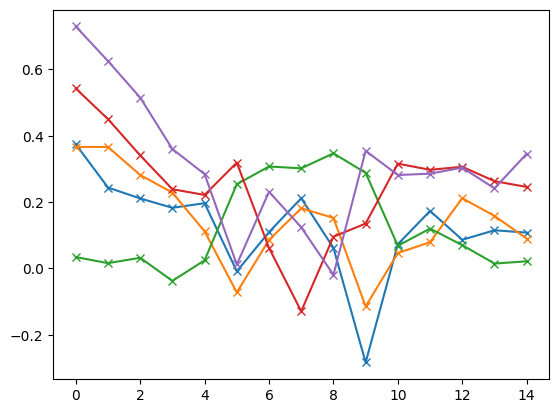

In [5]:
Xs = range(X_train.shape[1]+1)
for i in range(5):
    l = []
    for j in range(X_train.shape[1]):
        l.append(X_train[i][j][0])
    l.append(y_train[i])
    plt.plot(Xs, l,  '-x')


In [6]:
# Create a GRU model
def create_gru_model(units=24, input_shape=(14, 1)):
    """
    Create a simple GRU model with one GRU layer followed by a Dense output layer.
    """
    model = Sequential([
        GRU(units, input_shape=input_shape, activation='tanh', 
            recurrent_activation='sigmoid', name='gru_layer'),
        Dense(1, name='output_layer')
    ])
    
    # Build the model
    model.build(input_shape=(None,) + input_shape)
    
    model.compile(optimizer='adam', loss='mse')
    return model

In [7]:
# Create and compile the model
gru_model = create_gru_model()

# Print model summary
print("GRU Model architecture summary:")
gru_model.summary()

GRU Model architecture summary:


c:\Program Files\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_layer (GRU)                 │ (None, 24)             │         1,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,969 (7.69 KB)

 Trainable params: 1,969 (7.69 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = gru_model.fit(X_train, y_train, 
                    epochs=35, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0322 - val_loss: 0.0093
Epoch 2/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - val_loss: 0.0058
Epoch 3/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0071 - val_loss: 0.0043
Epoch 4/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0057 - val_loss: 0.0036
Epoch 5/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - val_loss: 0.0033
Epoch 6/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - val_loss: 0.0031
Epoch 7/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - val_loss: 0.0030
Epoch 8/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039 - val_loss: 0.0030
Epoch 9/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0038 - val_loss: 0.0030
Epoch 10/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 11/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 12/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 -

In [9]:
# Visualize training history
def plot_training_history(history):
    """
    Plot the training and validation loss during model training.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('GRU Model Loss During Training')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    print("In a real application, this would display a plot of training/validation loss")


# Making predictions and visualizing results
# Making predictions and visualizing results
def visualize_predictions(model, X_test, y_test, num_examples=5):
    """
    Visualize predictions against actual values.
    """
    predictions = model.predict(X_test[:num_examples])
    
    print("\nGRU Predictions vs Actual Values:")
    for i in range(num_examples):
        print(f"Example {i+1}:")
        print(f"First value: {X_test[i, 0, 0]:.4f}")
        print(f"Middle value: {X_test[i, len(X_test[i])//2, 0]:.4f}")
        print(f"Last input value: {X_test[i, -1, 0]:.4f}")
        print(f"Predicted next value: {predictions[i][0]:.4f}")
        print(f"Actual next value: {y_test[i]:.4f}")
        print(f"Error: {abs(predictions[i][0] - y_test[i]):.4f}")
        print("-" * 50)


In a real application, this would display a plot of training/validation loss


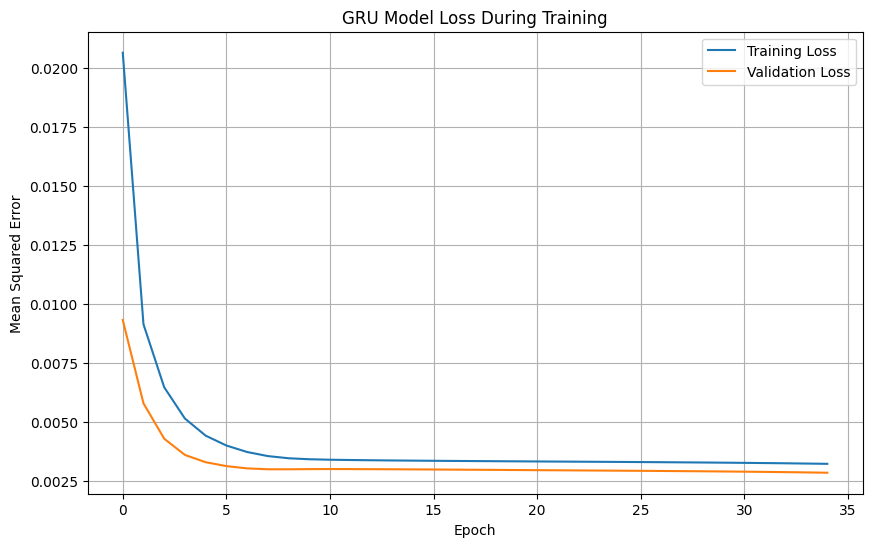

In [10]:
plot_training_history(history)

In [11]:
# Show predictions
visualize_predictions(gru_model, X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step

GRU Predictions vs Actual Values:
Example 1:
First value: 0.7170
Middle value: 0.0505
Last input value: 0.2362
Predicted next value: 0.2738
Actual next value: 0.3109
Error: 0.0371
--------------------------------------------------
Example 2:
First value: 0.4384
Middle value: 0.0716
Last input value: 0.2256
Predicted next value: 0.2428
Actual next value: 0.2015
Error: 0.0412
--------------------------------------------------
Example 3:
First value: 0.6699
Middle value: 0.0659
Last input value: 0.1480
Predicted next value: 0.2107
Actual next value: 0.2240
Error: 0.0133
--------------------------------------------------
Example 4:
First value: 0.5591
Middle value: -0.1690
Last input value: 0.3242
Predicted next value: 0.3134
Actual next value: 0.3185
Error: 0.0050
--------------------------------------------------
Example 5:
First value: 0.0572
Middle value: 0.3666
Last input value: 0.0024
Predicted next value: 0.0180
Actual next value: 0.0001
Error

In [12]:
# Educational explanation of GRU architecture
def explain_gru_architecture():
    """
    Explain the GRU architecture for educational purposes.
    """
    print("\n=== GRU Architecture for Educational Use ===")
    print("""
GRU (Gated Recurrent Unit) Architecture:

1. Update Gate (z_t): 
   - Decides how much of the previous memory to keep
   - Analogous to LSTM's forget and input gates combined
   - Formula: z_t = σ(W_z · [h_(t-1), x_t] + b_z)

2. Reset Gate (r_t):
   - Controls how much of the previous state to forget
   - Formula: r_t = σ(W_r · [h_(t-1), x_t] + b_r)

3. Current Memory Content:
   - Formula: h̃_t = tanh(W · [r_t * h_(t-1), x_t] + b)
   - The reset gate controls how much of previous state affects the current memory

4. Final Memory at Current Step:
   - Formula: h_t = (1 - z_t) * h_(t-1) + z_t * h̃_t
   - The update gate controls how much of the current and previous memory to use

Key Differences from LSTM:
- No separate cell state (C_t) - just hidden state (h_t)
- Fewer parameters than LSTM (3 gates vs 4)
- Often similar performance with less computational overhead
    """)

# Explain GRU architecture
explain_gru_architecture()


=== GRU Architecture for Educational Use ===

GRU (Gated Recurrent Unit) Architecture:

1. Update Gate (z_t): 
   - Decides how much of the previous memory to keep
   - Analogous to LSTM's forget and input gates combined
   - Formula: z_t = σ(W_z · [h_(t-1), x_t] + b_z)

2. Reset Gate (r_t):
   - Controls how much of the previous state to forget
   - Formula: r_t = σ(W_r · [h_(t-1), x_t] + b_r)

3. Current Memory Content:
   - Formula: h̃_t = tanh(W · [r_t * h_(t-1), x_t] + b)
   - The reset gate controls how much of previous state affects the current memory

4. Final Memory at Current Step:
   - Formula: h_t = (1 - z_t) * h_(t-1) + z_t * h̃_t
   - The update gate controls how much of the current and previous memory to use

Key Differences from LSTM:
- No separate cell state (C_t) - just hidden state (h_t)
- Fewer parameters than LSTM (3 gates vs 4)
- Often similar performance with less computational overhead
    


In [13]:

# Educational comparison of GRU vs LSTM and Simple RNN
def explain_gru_advantages():
    """
    Explain the advantages and distinctions of GRU compared to LSTM and Simple RNN.
    """
    print("\n=== GRU Advantages and Comparison ===")
    print("""
How GRU Compares to Other RNNs:

1. GRU vs Simple RNN:
   - Like LSTM, GRU solves the vanishing gradient problem
   - GRU can model longer-term dependencies
   - GRU has more stable training dynamics
   - GRU can selectively update its hidden state

2. GRU vs LSTM:
   - Computational Efficiency:
     - GRU has fewer parameters (2 gates vs 3 gates + cell state)
     - Typically trains faster than LSTM
   - Memory Usage:
     - GRU uses less memory with a single hidden state
     - LSTM maintains separate cell state and hidden state
   - Performance:
     - Similar performance on many tasks
     - LSTM may perform better on longer sequences or more complex patterns
     - GRU often works better with smaller datasets due to simpler model

3. When to Choose GRU:
   - Limited computational resources
   - Smaller datasets
   - When speed is a priority
   - When LSTM seems to overfit

4. Parameter Count Comparison (with 24 units, 1 feature):
   - GRU: ~2,353 parameters
   - LSTM: ~3,217 parameters
   - Simple RNN: ~649 parameters
    """)

# Explain GRU advantages
explain_gru_advantages()


=== GRU Advantages and Comparison ===

How GRU Compares to Other RNNs:

1. GRU vs Simple RNN:
   - Like LSTM, GRU solves the vanishing gradient problem
   - GRU can model longer-term dependencies
   - GRU has more stable training dynamics
   - GRU can selectively update its hidden state

2. GRU vs LSTM:
   - Computational Efficiency:
     - GRU has fewer parameters (2 gates vs 3 gates + cell state)
     - Typically trains faster than LSTM
   - Memory Usage:
     - GRU uses less memory with a single hidden state
     - LSTM maintains separate cell state and hidden state
   - Performance:
     - Similar performance on many tasks
     - LSTM may perform better on longer sequences or more complex patterns
     - GRU often works better with smaller datasets due to simpler model

3. When to Choose GRU:
   - Limited computational resources
   - Smaller datasets
   - When speed is a priority
   - When LSTM seems to overfit

4. Parameter Count Comparison (with 24 units, 1 feature):
   - GRU: ~

In [14]:

# Demonstrating how to use GRU for practical sequence tasks
def explain_practical_applications():
    """
    Describe practical applications of GRU networks.
    """
    print("\n=== Practical Applications of GRU Networks ===")
    print("""
Common Applications for GRU Networks:

1. Natural Language Processing:
   - Text classification
   - Sentiment analysis
   - Named entity recognition
   - Machine translation (before transformers became dominant)

2. Time Series Forecasting:
   - Stock price prediction
   - Weather forecasting
   - Energy consumption prediction
   - Sensor data analysis

3. Speech Recognition:
   - Converting spoken language to text
   - Speaker identification

4. Anomaly Detection:
   - Identifying unusual patterns in sequences
   - Fraud detection in transaction streams
   - Network intrusion detection

5. Music Generation:
   - Learning and generating musical sequences

GRUs are often selected for these tasks when:
- Computational efficiency is important
- The sequences have medium-length dependencies
- The dataset size is moderate
- Real-time performance is needed
    """)

# Explain practical applications
explain_practical_applications()


=== Practical Applications of GRU Networks ===

Common Applications for GRU Networks:

1. Natural Language Processing:
   - Text classification
   - Sentiment analysis
   - Named entity recognition
   - Machine translation (before transformers became dominant)

2. Time Series Forecasting:
   - Stock price prediction
   - Weather forecasting
   - Energy consumption prediction
   - Sensor data analysis

3. Speech Recognition:
   - Converting spoken language to text
   - Speaker identification

4. Anomaly Detection:
   - Identifying unusual patterns in sequences
   - Fraud detection in transaction streams
   - Network intrusion detection

5. Music Generation:
   - Learning and generating musical sequences

GRUs are often selected for these tasks when:
- Computational efficiency is important
- The sequences have medium-length dependencies
- The dataset size is moderate
- Real-time performance is needed
    
